In [ ]:
#installing pymatgen library
!pip install pymatgen

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 40.6 MB 1.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 514 kB 47.4 MB/s 
     |████████████████████████████████| 109 kB 62.1 MB/s 
     |████████████████████████████████| 66 kB 4.4 MB/s 
     |████████████████████████████████| 98 kB 7.1 MB/s 
     |████████████████████████████████| 500 kB 54.4 MB/s 
  Created wheel for pymatgen: filename=pymatgen-2022.0.17-cp37-cp37m-linux_x86_64.whl size=41841025 sha256=8bb9ac96435153e854a6e0941b00c0e0708fa9aa9187d3f12fbcc63250c830e7
  Stored in directory: /root/.cache/pip/wheels/cf/f6/22/58a9be23c5f1b452770e02ff42047175eaf0f9c2f15219fc76
Successfully built pymatgen


In [ ]:
#installing CBFV library
!pip install cbfv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 539 kB 5.2 MB/s 


In [ ]:
#importing libraries to be used
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
from pymatgen.ext.matproj import MPRester
from CBFV.composition import generate_features
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sn

Part 1 : Procuring data from Materials Project website

In [ ]:
#API key for accessing data from Materials Project website
my_api='wtqOVPaNJW3S58bezoE4'

In [ ]:
mpr = MPRester(my_api)
temp_data=mpr.query('**O3',['pretty_formula','crystal_system']) #running a query to get formulae and crystal system of ABO2 type compounds
temp_data

100%|██████████| 2398/2398 [00:10<00:00, 226.77it/s]


[{'pretty_formula': 'CaFeO3', 'crystal_system': 'cubic'},
 {'pretty_formula': 'BaSiO3', 'crystal_system': 'cubic'},
 {'pretty_formula': 'BaGeO3', 'crystal_system': 'cubic'},
 {'pretty_formula': 'CdIrO3', 'crystal_system': 'cubic'},
 {'pretty_formula': 'CaRhO3', 'crystal_system': 'cubic'},
 {'pretty_formula': 'CaRuO3', 'crystal_system': 'cubic'},
 {'pretty_formula': 'CdRuO3', 'crystal_system': 'cubic'},
 {'pretty_formula': 'BaRhO3', 'crystal_system': 'cubic'},
 {'pretty_formula': 'BaMnO3', 'crystal_system': 'cubic'},
 {'pretty_formula': 'CaVO3', 'crystal_system': 'cubic'},
 {'pretty_formula': 'CaIrO3', 'crystal_system': 'cubic'},
 {'pretty_formula': 'CaHfO3', 'crystal_system': 'cubic'},
 {'pretty_formula': 'CdRhO3', 'crystal_system': 'cubic'},
 {'pretty_formula': 'CdSiO3', 'crystal_system': 'cubic'},
 {'pretty_formula': 'CdSnO3', 'crystal_system': 'cubic'},
 {'pretty_formula': 'CdOsO3', 'crystal_system': 'cubic'},
 {'pretty_formula': 'CaGeO3', 'crystal_system': 'cubic'},
 {'pretty_formu

In [ ]:
data=pd.DataFrame.from_dict(temp_data) # converting above data into dataframe
data

,pretty_formula,crystal_system
0,CaFeO3,cubic
1,BaSiO3,cubic
2,BaGeO3,cubic
3,CdIrO3,cubic
4,CaRhO3,cubic
...,...,...
2393,ZnCrO3,orthorhombic
2394,ZnMoO3,orthorhombic
2395,ZnNiO3,orthorhombic
2396,ZnWO3,orthorhombic


Part 2 : Data pre-processing

In [ ]:
data = data.rename(columns= {'pretty_formula':'formula','crystal_system':'target'}) #renaming columns
data

,formula,target
0,CaFeO3,cubic
1,BaSiO3,cubic
2,BaGeO3,cubic
3,CdIrO3,cubic
4,CaRhO3,cubic
...,...,...
2393,ZnCrO3,orthorhombic
2394,ZnMoO3,orthorhombic
2395,ZnNiO3,orthorhombic
2396,ZnWO3,orthorhombic


In [ ]:
#generating composition based feature vectors for all ABO2 compounds
X, y, formulae, skipped = generate_features(data, elem_prop ='oliynyk', drop_duplicates = False, extend_features = True, sum_feat=False)
list(X.columns)

Processing Input Data: 100%|██████████| 2398/2398 [00:00<00:00, 17002.83it/s]


	Featurizing Compositions...


Assigning Features...: 100%|██████████| 2398/2398 [00:00<00:00, 7139.53it/s]



NOTE: Your data contains formula with exotic elements. These were skipped.
	Creating Pandas Objects...


['avg_Atomic_Number',
 'avg_Atomic_Weight',
 'avg_Period',
 'avg_group',
 'avg_families',
 'avg_Metal',
 'avg_Nonmetal',
 'avg_Metalliod',
 'avg_Mendeleev_Number',
 'avg_l_quantum_number',
 'avg_Atomic_Radius',
 'avg_Miracle_Radius_[pm]',
 'avg_Covalent_Radius',
 'avg_Zunger_radii_sum',
 'avg_ionic_radius',
 'avg_crystal_radius',
 'avg_Pauling_Electronegativity',
 'avg_MB_electonegativity',
 'avg_Gordy_electonegativity',
 'avg_Mulliken_EN',
 'avg_Allred-Rockow_electronegativity',
 'avg_metallic_valence',
 'avg_number_of_valence_electrons',
 'avg_gilmor_number_of_valence_electron',
 'avg_valence_s',
 'avg_valence_p',
 'avg_valence_d',
 'avg_valence_f',
 'avg_Number_of_unfilled_s_valence_electrons',
 'avg_Number_of_unfilled_p_valence_electrons',
 'avg_Number_of_unfilled_d_valence_electrons',
 'avg_Number_of_unfilled_f_valence_electrons',
 'avg_outer_shell_electrons',
 'avg_1st_ionization_potential_(kJ/mol)',
 'avg_polarizability(A^3)',
 'avg_Melting_point_(K)',
 'avg_Boiling_Point_(K)',


In [ ]:
X.head() 

,avg_Atomic_Number,avg_Atomic_Weight,avg_Period,avg_group,avg_families,avg_Metal,avg_Nonmetal,avg_Metalliod,avg_Mendeleev_Number,avg_l_quantum_number,...,mode_polarizability(A^3),mode_Melting_point_(K),mode_Boiling_Point_(K),mode_Density_(g/mL),mode_specific_heat_(J/g_K)_,mode_heat_of_fusion_(kJ/mol)_,mode_heat_of_vaporization_(kJ/mol)_,mode_thermal_conductivity_(W/(m_K))_,mode_heat_atomization(kJ/mol),mode_Cohesive_energy
0,14.0,28.78464,2.8,11.6,5.4,0.4,0.6,0.0,64.6,1.0,...,0.793,54.75,90.15,0.00143,0.92,0.22259,3.4099,0.02674,249.0,2.62
1,18.8,42.68214,3.0,12.8,5.8,0.2,0.8,0.0,69.6,0.8,...,0.793,54.75,90.15,0.00143,0.92,0.22259,3.4099,0.02674,249.0,2.62
2,22.4,51.58704,3.2,12.8,5.8,0.2,0.6,0.2,69.8,0.8,...,0.793,54.75,90.15,0.00143,0.92,0.22259,3.4099,0.02674,249.0,2.62
3,29.8,70.52584,3.4,13.8,5.8,0.4,0.6,0.0,78.2,1.0,...,0.793,54.75,90.15,0.00143,0.92,0.22259,3.4099,0.02674,249.0,2.62
4,17.8,38.19634,3.0,11.8,5.4,0.4,0.6,0.0,65.4,1.0,...,0.793,54.75,90.15,0.00143,0.92,0.22259,3.4099,0.02674,249.0,2.62


In [ ]:
y

0              cubic
1              cubic
2              cubic
3              cubic
4              cubic
            ...     
2393    orthorhombic
2394    orthorhombic
2395    orthorhombic
2396    orthorhombic
2397    orthorhombic
Name: target, Length: 2398, dtype: object

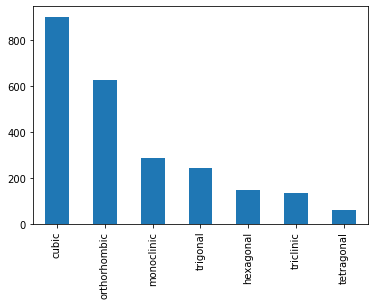

In [ ]:
y.value_counts().plot(kind='bar')

In [ ]:
#Target values are not numerical. Hence, using label encoding to convert them from categorical data to numerical data
label_encoder = preprocessing.LabelEncoder()
y_le= label_encoder.fit_transform(y)
y_le
print(list(label_encoder.classes_))
print(label_encoder.transform(['cubic',
 'hexagonal',
 'monoclinic',
 'orthorhombic',
 'tetragonal',
 'triclinic',
 'trigonal']))

['cubic', 'hexagonal', 'monoclinic', 'orthorhombic', 'tetragonal', 'triclinic', 'trigonal']
[0 1 2 3 4 5 6]


In [ ]:
#scaling data using Standard Scaler 
std_scaler=StandardScaler()
col=list(X.columns)
X_scaled = std_scaler.fit_transform(X.to_numpy())
X_scaled = pd.DataFrame(X_scaled, columns=col)
X_scaled

,avg_Atomic_Number,avg_Atomic_Weight,avg_Period,avg_group,avg_families,avg_Metal,avg_Nonmetal,avg_Metalliod,avg_Mendeleev_Number,avg_l_quantum_number,...,mode_polarizability(A^3),mode_Melting_point_(K),mode_Boiling_Point_(K),mode_Density_(g/mL),mode_specific_heat_(J/g_K)_,mode_heat_of_fusion_(kJ/mol)_,mode_heat_of_vaporization_(kJ/mol)_,mode_thermal_conductivity_(W/(m_K))_,mode_heat_atomization(kJ/mol),mode_Cohesive_energy
0,-0.948508,-1.021868,-0.477482,-0.643989,-0.727418,0.653994,-0.503713,-0.293361,-0.867674,-0.503527,...,0.0,0.0,1.421085e-14,-2.168404e-19,-3.330669e-16,2.775558e-17,-4.440892e-16,6.938894e-18,0.0,-8.881784e-16
1,-0.206695,-0.185980,0.047267,0.228653,0.229438,-1.316205,1.771060,-0.293361,-0.204437,-1.226123,...,0.0,0.0,1.421085e-14,-2.168404e-19,-3.330669e-16,2.775558e-17,-4.440892e-16,6.938894e-18,0.0,-8.881784e-16
2,0.349665,0.349620,0.572016,0.228653,0.229438,-1.316205,-0.503713,3.370599,-0.177907,-1.226123,...,0.0,0.0,1.421085e-14,-2.168404e-19,-3.330669e-16,2.775558e-17,-4.440892e-16,6.938894e-18,0.0,-8.881784e-16
3,1.493293,1.488725,1.096765,0.955855,0.229438,0.653994,-0.503713,-0.293361,0.936332,-0.503527,...,0.0,0.0,1.421085e-14,-2.168404e-19,-3.330669e-16,2.775558e-17,-4.440892e-16,6.938894e-18,0.0,-8.881784e-16
4,-0.361239,-0.455786,0.047267,-0.498549,-0.727418,0.653994,-0.503713,-0.293361,-0.761556,-0.503527,...,0.0,0.0,1.421085e-14,-2.168404e-19,-3.330669e-16,2.775558e-17,-4.440892e-16,6.938894e-18,0.0,-8.881784e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2393,-0.701237,-0.763705,-0.477482,0.519534,0.229438,0.653994,-0.503713,-0.293361,0.617978,0.941665,...,0.0,0.0,1.421085e-14,-2.168404e-19,-3.330669e-16,2.775558e-17,-4.440892e-16,6.938894e-18,0.0,-8.881784e-16
2394,-0.144877,-0.235090,0.047267,0.519534,0.229438,0.653994,-0.503713,-0.293361,0.644508,0.941665,...,0.0,0.0,1.421085e-14,-2.168404e-19,-3.330669e-16,2.775558e-17,-4.440892e-16,6.938894e-18,0.0,-8.881784e-16
2395,-0.577602,-0.683141,-0.477482,1.101296,0.229438,0.653994,-0.503713,-0.293361,0.936332,0.941665,...,0.0,0.0,1.421085e-14,-2.168404e-19,-3.330669e-16,2.775558e-17,-4.440892e-16,6.938894e-18,0.0,-8.881784e-16
2396,0.844207,0.822288,0.572016,0.519534,0.229438,0.653994,-0.503713,-0.293361,0.671037,0.941665,...,0.0,0.0,1.421085e-14,-2.168404e-19,-3.330669e-16,2.775558e-17,-4.440892e-16,6.938894e-18,0.0,-8.881784e-16


In [ ]:
#splitting data into test and train data keeping 30% data as test data and 70% data as train data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_le, test_size = 0.3, random_state = 0)

Part 3 : Building and evaluating models

In [ ]:
#Creating a function to print evaluation scores for models
def evaluation_of_model(y,pred):
    print("Accuracy : %.2f" % accuracy_score(y,pred))
    print("F1 : %.2f" % f1_score(y,pred, average='macro'))
    print("Precision : %.2f" % precision_score(y,pred, average='macro'))
    print("recall : %.2f" % recall_score(y,pred, average='macro'))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


 
Logistic regression results:
Accuracy : 0.49
F1 : 0.34
Precision : 0.36
recall : 0.33
 
Confusion matrix for Logistic Regression : 


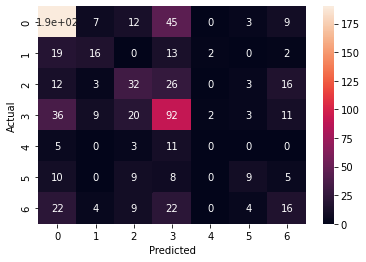

In [ ]:
#Using logistic regression and printing its evaluation metrics
lg_classifier = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lg_classifier.fit(X_train, y_train)
lg_pred = lg_classifier.predict(X_test)
print(" ")
print("Logistic regression results:")
evaluation_of_model(y_test,lg_pred)
print(" ")
print("Confusion matrix for Logistic Regression : ")
confusion_matrix_lg = pd.crosstab(y_test, lg_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix_lg, annot=True)
plt.show()

 
Random Forest Classifier results:
Accuracy : 0.47
F1 : 0.33
Precision : 0.34
recall : 0.32
 
Confusion matrix for Random Forest Classifier : 


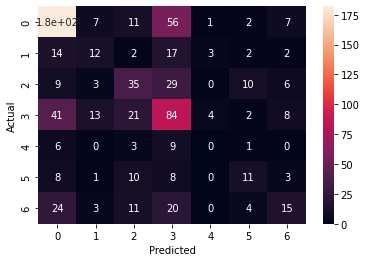

In [ ]:
#Using random forest classifier and printing its evaluation metrics
rf_classifier = RandomForestClassifier(n_estimators = 1500) 
rf_classifier.fit(X_train, y_train)
rf_pred = rf_classifier.predict(X_test)
print(" ")
print("Random Forest Classifier results:")
evaluation_of_model(y_test, rf_pred)
print(" ")
print("Confusion matrix for Random Forest Classifier : ")
confusion_matrix_rf = pd.crosstab(y_test, rf_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix_rf, annot=True)
plt.show()

 
K Neighbors Classifier results:
Accuracy : 0.49
F1 : 0.33
Precision : 0.37
recall : 0.32
 
Confusion matrix for K Neighbors Classifier : 


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


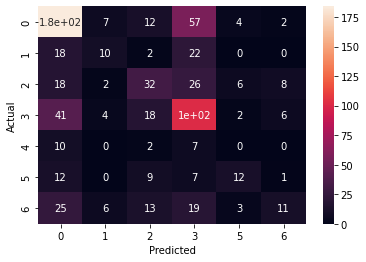

In [ ]:
#Using K Neighbors Classifier and printing its evaluation metrics
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print(" ")
print("K Neighbors Classifier results:")
evaluation_of_model(y_test, knn_pred)
print(" ")
print("Confusion matrix for K Neighbors Classifier : ")
confusion_matrix_knn = pd.crosstab(y_test, knn_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix_knn, annot=True)
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
INPUT_SHAPE = [len(X_train.columns)]
BATCH_SIZE = 32
SEED = 0
tf.random.set_seed(SEED)
np.random.seed(SEED)

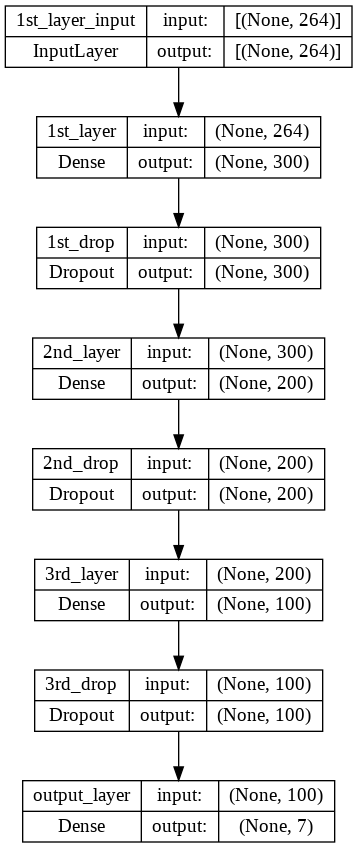

In [ ]:
model_1 = tf.keras.Sequential([
              tf.keras.layers.Dense(300, activation='relu', name="1st_layer", input_shape=(INPUT_SHAPE)),
              tf.keras.layers.Dropout(.4, name="1st_drop"),
              tf.keras.layers.Dense(200, activation='relu', name="2nd_layer"),
              tf.keras.layers.Dropout(.4, name="2nd_drop"),
              tf.keras.layers.Dense(100, activation='relu', name="3rd_layer"),
              tf.keras.layers.Dropout(.4, name="3rd_drop"),
              tf.keras.layers.Dense(7, activation='softmax', name="output_layer")
], name="model_1")

model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
                metrics=["accuracy"])
plot_model(model_1, show_shapes=True)

In [ ]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 1st_layer (Dense)           (None, 300)               79500     
                                                                 
 1st_drop (Dropout)          (None, 300)               0         
                                                                 
 2nd_layer (Dense)           (None, 200)               60200     
                                                                 
 2nd_drop (Dropout)          (None, 200)               0         
                                                                 
 3rd_layer (Dense)           (None, 100)               20100     
                                                                 
 3rd_drop (Dropout)          (None, 100)               0         
                                                                 
 output_layer (Dense)        (None, 7)                 707 

In [ ]:
history_1 = model_1.fit(X_train, y_train, 
                      epochs=25, 
                      batch_size=32, 
                      validation_data=(X_test, y_test),
                      verbose=False)

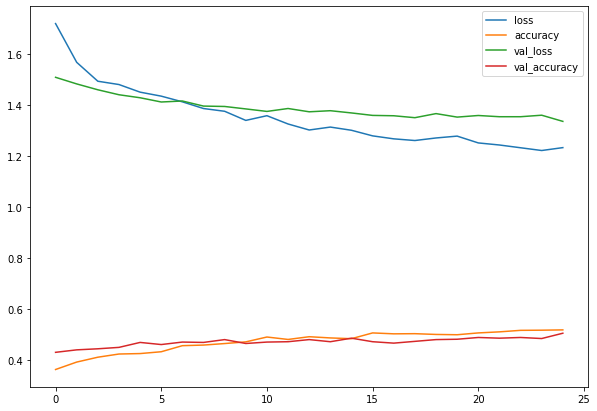

In [ ]:
pd.DataFrame(history_1.history).plot(figsize=(10, 7));

In [ ]:
model_1.evaluate(X_test, y_test)

23/23 [==============================] - 0s 3ms/step - loss: 1.3359 - accuracy: 0.5042


[1.335914969444275, 0.5041666626930237]